<a href="https://colab.research.google.com/github/akinahomwabella/Data-Imputation/blob/main/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
import kagglehub
import os


# Download the dataset
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

# Check if the downloaded path exists and handle the dataset
if os.path.exists(path):
    print(f"Dataset downloaded to: {path}")

    # Find the training and validation CSV files
    training_file = os.path.join(path, "twitter_training.csv")
    validation_file = os.path.join(path, "twitter_validation.csv")

    # Read the CSV files into DataFrames
    if os.path.exists(training_file) and os.path.exists(validation_file):
        training_data = pd.read_csv(training_file)
        validation_data = pd.read_csv(validation_file)
        print("Training and validation datasets loaded.")
    else:
        print("Error: twitter_training.csv or twitter_validation.csv not found in the downloaded dataset.")
        # You might need to handle this error or exit the script
else:
    print("Failed to download the dataset.")

# Define interpolation functions
def linear_interpolation(data, column):
    return data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

def spline_interpolation(data, column, order=3):
    return data[column].interpolate(method='spline', order=order).fillna(method='bfill').fillna(method='ffill')

def knn_imputation(data, column, n_neighbors=5):
    temp_data = data.copy()
    imputer = KNNImputer(n_neighbors=n_neighbors)
    temp_data[[column]] = imputer.fit_transform(temp_data[[column]])
    return temp_data[column]



# Step 2: Check for missing values
print("Missing values in training data:")
print(training_data.isnull().sum())

print("\nMissing values in validation data:")
print(validation_data.isnull().sum())

# Step 3: Apply interpolation
columns_to_interpolate = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
# Apply to training data
for column in columns_to_interpolate:
    if column in training_data.columns:
        training_data[f'{column}_linear'] = linear_interpolation(training_data, column)
        training_data[f'{column}_spline'] = spline_interpolation(training_data, column)
        training_data[f'{column}_knn'] = knn_imputation(training_data, column)

# Apply to validation data
for column in columns_to_interpolate:
    if column in validation_data.columns:
        validation_data[f'{column}_linear'] = linear_interpolation(validation_data, column)
        validation_data[f'{column}_spline'] = spline_interpolation(validation_data, column)
        validation_data[f'{column}_knn'] = knn_imputation(validation_data, column)

# Step 4: Save the cleaned datasets
training_data.to_csv('training_cleaned.csv', index=False)
validation_data.to_csv('validation_cleaned.csv', index=False)

print("\nCleaned datasets saved as 'training_cleaned.csv' and 'validation_cleaned.csv'.")

Dataset downloaded to: /root/.cache/kagglehub/datasets/jp797498e/twitter-entity-sentiment-analysis/versions/2
Training and validation datasets loaded.
Missing values in training data:
2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

Missing values in validation data:
3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                 


Logistic Regression Performance:
Accuracy: 0.6030, Precision: 0.6045, Recall: 0.6030, F1-Score: 0.5981
              precision    recall  f1-score   support

  Irrelevant       0.59      0.40      0.48       172
    Negative       0.58      0.73      0.65       266
     Neutral       0.60      0.61      0.60       285
    Positive       0.64      0.60      0.62       277

    accuracy                           0.60      1000
   macro avg       0.60      0.59      0.59      1000
weighted avg       0.60      0.60      0.60      1000


Random Forest Performance (Best Params):
Accuracy: 0.9230, Precision: 0.9250, Recall: 0.9230, F1-Score: 0.9228
              precision    recall  f1-score   support

  Irrelevant       0.99      0.84      0.91       172
    Negative       0.94      0.95      0.95       266
     Neutral       0.90      0.93      0.92       285
    Positive       0.90      0.93      0.91       277

    accuracy                           0.92      1000
   macro avg       0.93

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5361 - loss: 1.0868
Epoch 2/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7351 - loss: 0.6762
Epoch 3/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8127 - loss: 0.4856
Epoch 4/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8515 - loss: 0.3869
Epoch 5/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8721 - loss: 0.3315
Epoch 6/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8833 - loss: 0.2944
Epoch 7/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8934 - loss: 0.2725
Epoch 8/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9044 - loss: 0.2421
Epoch 9/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9046 - loss: 0.2387
Epoch 10/10
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9095 - loss: 0.2269
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Neural Network Performance:
Accuracy: 0.9050, Precision: 0.9072, Recall: 0.

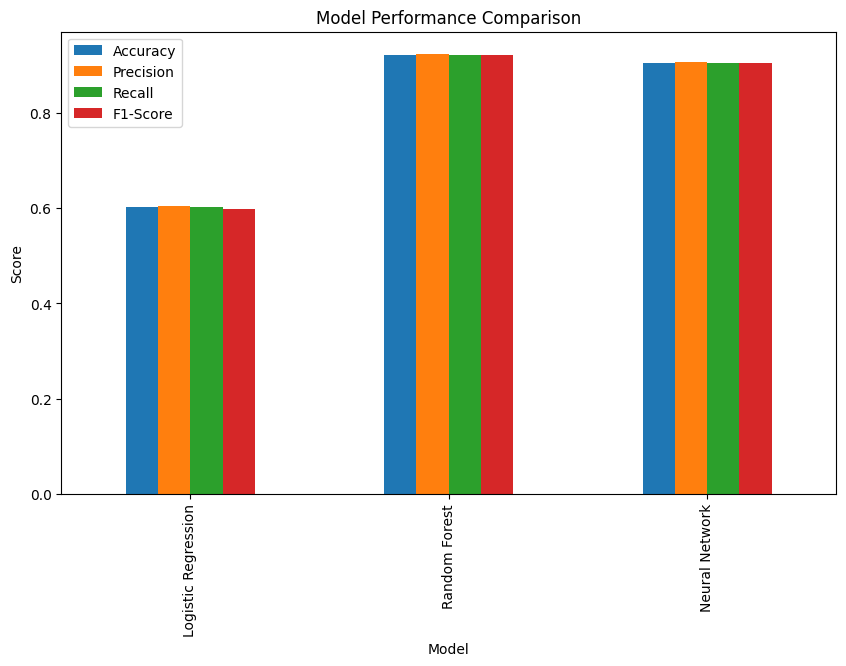

In [4]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sklearn.impute


# Load the datasets
training_data = pd.read_csv('training_cleaned.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
validation_data = pd.read_csv('validation_cleaned.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])

# Define the column containing the tweet content
tweet_content_column = 'Tweet content'

# Step 1: Compute sentiment features (polarity and subjectivity)
def compute_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

training_data['polarity'], training_data['subjectivity'] = zip(
    *training_data[tweet_content_column].apply(compute_sentiment)
)
validation_data['polarity'], validation_data['subjectivity'] = zip(
    *validation_data[tweet_content_column].apply(compute_sentiment)
)

# Step 2: Extract TF-IDF features from 'Tweet content'
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_train = tfidf_vectorizer.fit_transform(training_data[tweet_content_column].fillna(''))
tfidf_val = tfidf_vectorizer.transform(validation_data[tweet_content_column].fillna(''))

# Step 3: Create additional features (e.g., tweet length and hashtag count)
training_data['tweet_length'] = training_data[tweet_content_column].str.len()
training_data['num_hashtags'] = training_data[tweet_content_column].str.count('#')
validation_data['tweet_length'] = validation_data[tweet_content_column].str.len()
validation_data['num_hashtags'] = validation_data[tweet_content_column].str.count('#')

# Step 4: Combine features
feature_columns = ['polarity', 'subjectivity', 'tweet_length', 'num_hashtags']
X_train_features = training_data[feature_columns]
X_val_features = validation_data[feature_columns]

# Convert TF-IDF matrices to dense arrays and combine with additional features
X_train = np.hstack([X_train_features.values, tfidf_train.toarray()])
X_val = np.hstack([X_val_features.values, tfidf_val.toarray()])

# Target labels
y_train = training_data['sentiment']  # Replace with the actual label column
y_val = validation_data['sentiment']  # Replace with the actual label column

# Impute missing values using SimpleImputer before scaling
imputer = sklearn.impute.SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if needed
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_val_scaled)

# Evaluation Metrics
lr_accuracy = accuracy_score(y_val, lr_predictions)
lr_precision = precision_score(y_val, lr_predictions, average='weighted')
lr_recall = recall_score(y_val, lr_predictions, average='weighted')
lr_f1 = f1_score(y_val, lr_predictions, average='weighted')
print("\nLogistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1-Score: {lr_f1:.4f}")
print(classification_report(y_val, lr_predictions))

# Random Forest Model with Hyperparameter Tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_val_scaled)

# Evaluation Metrics
rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions, average='weighted')
rf_recall = recall_score(y_val, rf_predictions, average='weighted')
rf_f1 = f1_score(y_val, rf_predictions, average='weighted')
print("\nRandom Forest Performance (Best Params):")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")
print(classification_report(y_val, rf_predictions))
#Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Summarize Results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [lr_accuracy, rf_accuracy, nn_accuracy],
    'Precision': [lr_precision, rf_precision, nn_precision],
    'Recall': [lr_recall, rf_recall, nn_recall],
    'F1-Score': [lr_f1, rf_f1, nn_f1]
})
print("\nModel Performance Summary:")
print(results)

# Save Models
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(best_rf_model, 'random_forest_model.pkl')
nn_model.save('neural_network_model.h5')

# Plot Performance Metrics
results.set_index('Model').plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison")
plt.ylabel("Score")
plt.show()
